# Mantenimiento Predictivo

Se desarrollará un modelo predictivo del tipo clasificación para predecir si una máquina fresadora falla o no debido a sus condiciones de operación.
El dataset que se utilizará es sintético y está modelado a partir de una maquina fresadora existente y consiste en 10,000 datos guardados como filas y 14 atributos como columnas. Los atributos son los siguientes:

1.  UID - Identificador único
2.  Product ID - Identificador de producto
3.	Type - Tipo de producto
4.	Air temperature - Temperatura del aire
5.	Process temperature - Temperatura del proceso
6.	Rotational speed - Velocidad rotacional
7.	Torque - Torque
8.	Tool wear - Desgaste de herramiento
9.	Machine failure - Falla de máquina
10.	Tool weir failure (TWF) - Falla por desgaste
11.	Heat dissipation failure (HDF) - Falla por disipación de calor
12.	Power failure (PWF) - Falla por potencia
13.	Overstrain failure (OSF) - Falla por sobreesfuerzo
14.	Random failures (RNF) - Falla aleatoria

# Análisis inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows=500
pd.options.display.max_columns=500

In [2]:
dataset = "mantto_predictivo.csv"
df = pd.read_csv(dataset, sep=",", index_col=0) # Se usa la primera columna (UID) como ID
print("El dataset tiene la forma {}.".format(df.shape))

El dataset tiene la forma (10000, 13).


In [3]:
df.head(20)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
df.nunique()

Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [6]:
df.isnull().sum() / df.shape[0]

Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

No se cuentan con valores duplicados ni nulos.

Exploramos ahora los tipos de falla de la máquina.

In [4]:
low, med, high = df['Type'].value_counts()
print(f"Productos de baja calidad: {low}\nProductos de calidad media: {med}\nProductos de alta calidad: {high}")

Productos de baja calidad: 6000
Productos de calidad media: 2997
Productos de alta calidad: 1003


Distribución de falla en la máquina basado en la calidad del producto.

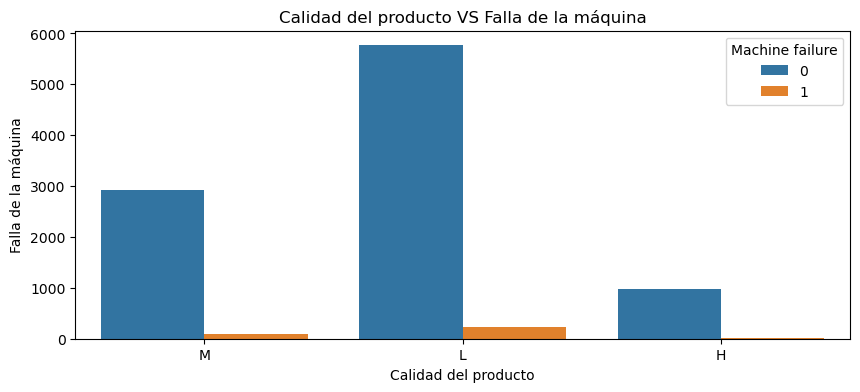

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Type', hue='Machine failure')
plt.title('Calidad del producto VS Falla de la máquina')
plt.xlabel('Calidad del producto')
plt.ylabel('Falla de la máquina')
plt.show()

In [5]:
cant_fallas_L = df.loc[(df["Type"]=="L") & (df["Machine failure"] == 1)].shape[0]
cant_fallas_M = df.loc[(df["Type"]=="M") & (df["Machine failure"] == 1)].shape[0]
cant_fallas_H = df.loc[(df["Type"]=="H") & (df["Machine failure"] == 1)].shape[0]

In [6]:
print(f"De la cantidad total de productos del tipo L ({low}), han fallado {cant_fallas_L}, es decir, el {round(cant_fallas_L/low*100,2)}%")
print(f"De la cantidad total de productos del tipo M ({med}), han fallado {cant_fallas_M}, es decir, el {round(cant_fallas_M/med*100,2)}%")
print(f"De la cantidad total de productos del tipo H ({high}), han fallado {cant_fallas_H}, es decir, el {round(cant_fallas_H/high*100,2)}%")

De la cantidad total de productos del tipo L (6000), han fallado 235, es decir, el 3.92%
De la cantidad total de productos del tipo M (2997), han fallado 83, es decir, el 2.77%
De la cantidad total de productos del tipo H (1003), han fallado 21, es decir, el 2.09%


Se visualiza que las fallas suelen ocurrir en mayor proporción cuando el producto es de baja calidad.

In [12]:
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [13]:
df["Machine failure"].value_counts(normalize=True)*100

Machine failure
0    96.61
1     3.39
Name: proportion, dtype: float64

Existen 5 distintos tipos de falla, las cuales varían en cantidad y en dependencia de variables.

In [14]:
print("Cantidad de valores de falla por desgaste: ", df["TWF"].value_counts()[1])
print("Cantidad de valores de falla por disipación de calor: ", df["HDF"].value_counts()[1])
print("Cantidad de valores de falla por falla de potencia: ", df["PWF"].value_counts()[1])
print("Cantidad de valores de falla por sobreesfuerzo: ", df["OSF"].value_counts()[1])
print("Cantidad de valores de falla por aleatoriedad: ", df["RNF"].value_counts()[1])

Cantidad de valores de falla por desgaste:  46
Cantidad de valores de falla por disipación de calor:  115
Cantidad de valores de falla por falla de potencia:  95
Cantidad de valores de falla por sobreesfuerzo:  98
Cantidad de valores de falla por aleatoriedad:  19


C:\Users\rober\AppData\Local\Temp\ipykernel_10804\1180092734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_falla.index, y=count_falla.values, errorbar=None, palette="Set3")


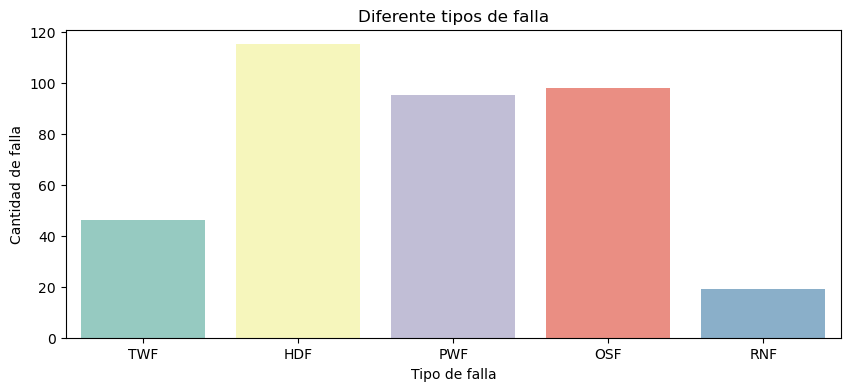

In [15]:
df_falla = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
count_falla = df_falla.sum()
plt.figure(figsize=(10, 4))
plt.title('Diferente tipos de falla')
plt.xlabel('Tipo de falla')
plt.ylabel('Cantidad de falla')
sns.barplot(x=count_falla.index, y=count_falla.values, errorbar=None, palette="Set3")
plt.show()

La mayor cantidad de fallas ocurren por disipación de calor (HDF), seguido por sobreesfuerzo (OSF), potencia (PWF), desgaste (TWF) y aleatoriedad (RNF).

Ahora analizamos la distribución de las variables continuas.

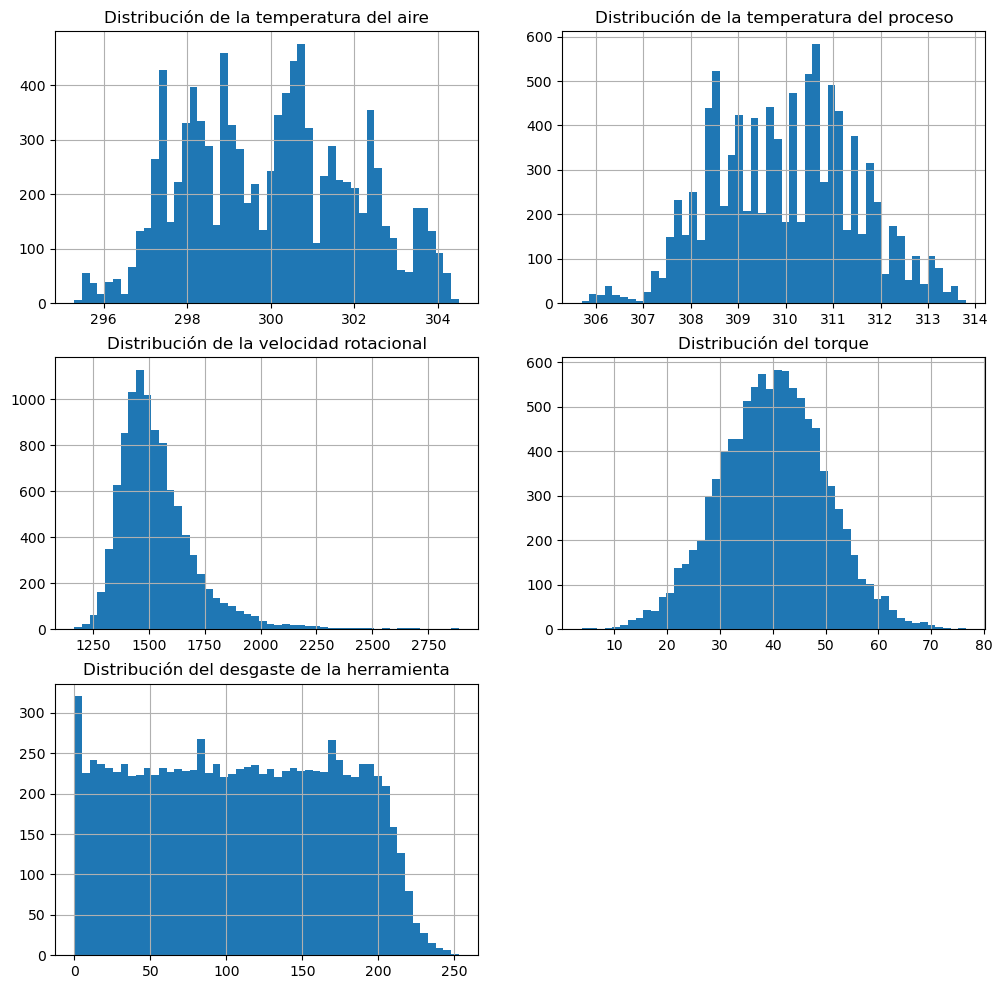

In [16]:
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
df["Air temperature [K]"].hist(bins = 50)
plt.title("Distribución de la temperatura del aire")

plt.subplot(3,2,2)
df["Process temperature [K]"].hist(bins = 50)
plt.title("Distribución de la temperatura del proceso")

plt.subplot(3,2,3)
df["Rotational speed [rpm]"].hist(bins = 50)
plt.title("Distribución de la velocidad rotacional")

plt.subplot(3,2,4)
df["Torque [Nm]"].hist(bins = 50)
plt.title("Distribución del torque")

plt.subplot(3,2,5)
df["Tool wear [min]"].hist(bins = 50)
plt.title("Distribución del desgaste de la herramienta")

plt.show()

De las gráficas anteriores se pueden sacar las siguientes conclusiones:

- Distribución de la temperatura del aire: La distribución parece multimodal, con varios picos a diferentes intervalos. No es una distribución normal, y hay variabilidad considerable en los datos.

- Distribución de la temperatura del proceso:  Similar a la temperatura del aire, esta distribución también parece multimodal con varios picos a diferentes intervalos. Hay una concentración de valores entre 308 y 311 grados.

- Distribución de la velocidad rotacional:  La distribución es asimétrica y sesgada a la derecha, con un pico alrededor de 1500. Los valores disminuyen gradualmente hacia la derecha.

- Distribución del torque: Esta distribución aproximadamente simétrica y parece seguir una distribución normal centrada alrededor de 40.

- Distribución del desgaste de la herramienta: Esta distribución es bastante uniforme con una ligera caída en la cola derecha. Hay algunos picos intermitentes que podrían indicar mediciones específicas.

# Preprocesamiento de datos:

En el dataset no se cuentan con valores nulos. Además, las variables ProductID y Type son categóricas y no numéricas, por lo tanto, se extraerá el valor numérico de ProductID y se almacenará en una nueva variable numérica llamada "Num_Serie", por el otro lado. se aplicará ordinal encoding en la variable Type, considerando que esta variable es del tipo categórica ordinal, ya que "H" indica un producto de alta calidad, "M" de media calidad, y "L" de baja calidad.

In [7]:
df["Num_Serie"] = df["Product ID"].str.replace("M", "").str.replace("L","").str.replace("H","")
df["Num_Serie"] = df["Num_Serie"].astype("int64")

In [8]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [["L", "M", "H"]]) # L = 0, M = 1, H = 2
df['PType'] = ordinal_encoder.fit_transform(df[["Type"]])

In [19]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Num_Serie,PType
UDI,,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,14860,1.0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,47181,0.0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,47182,0.0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,47183,0.0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,47184,0.0


In [9]:
# Se procede a eliminar las variables no numéricas
df.drop(columns="Product ID", inplace = True)
df.drop(columns="Type", inplace = True)

In [21]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Num_Serie,PType
UDI,,,,,,,,,,,,,
1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,14860,1.0
2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,47181,0.0
3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,47182,0.0
4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,47183,0.0
5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,47184,0.0


Nuestra variable objetivo es **"Machine failure"**, la cual indica si la máquina fresadora falla, debido a sus condiciones de operación. Adicionalmente, se tienen otras variables objetivo auxiliares, que vienen a ser la causa de falla de la máquina, por lo que si alguna de estas es True, automáticamente la variable "Machine failure" también será True.

El dataset explica explícitamente que variables causa cada tipo de falla, siendo estas:

- TWF : "Tool Wear"
- HDF : "Air temperature", "Process temperature" y "Rotational speed"
- PWF : "Torque" y "Rotational speed"
- OSF : "Torque", "Tool wear" y "PType"

Además, el último tipo de falla "RNF", indica que hay una chance de 0.1% de que la máquina falle independientemente de sus parámetros.

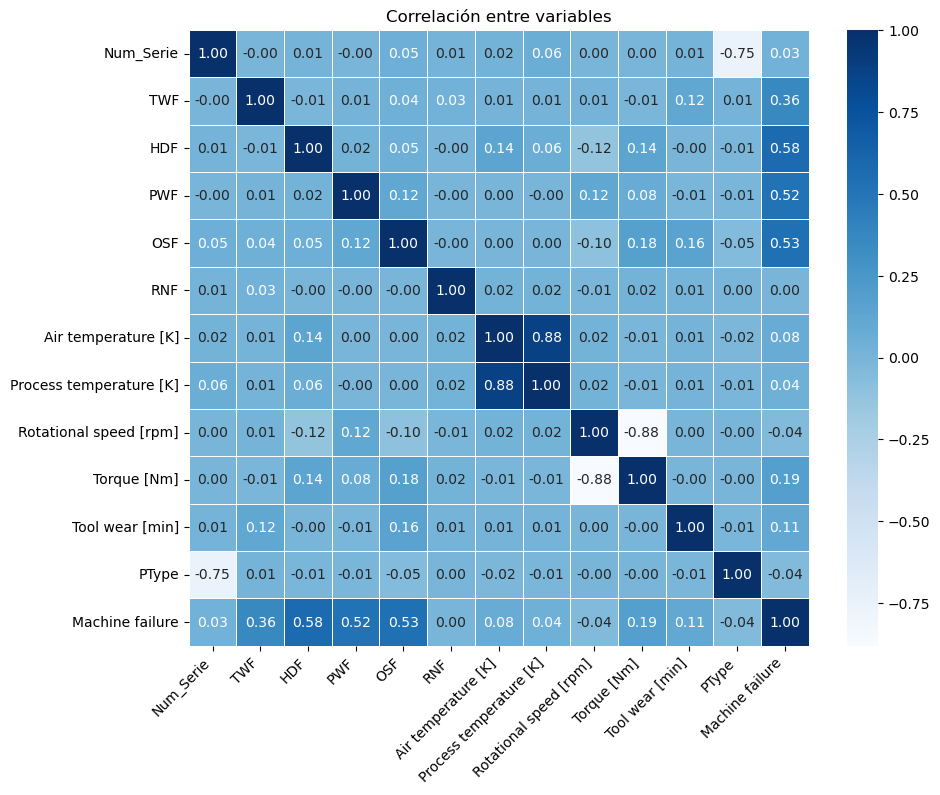

In [22]:
# De forma gráfica
plt.figure(figsize=(10, 8))
heatmap_data = df[['Num_Serie', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', "PType", 'Machine failure']]
df_corr = heatmap_data.corr().apply(lambda x: round(x, 2))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre variables')
plt.xticks(rotation=45, ha='right')
plt.show()

Analizando correlación entre "Rotational Speed", "Torque" y "Machine failure"

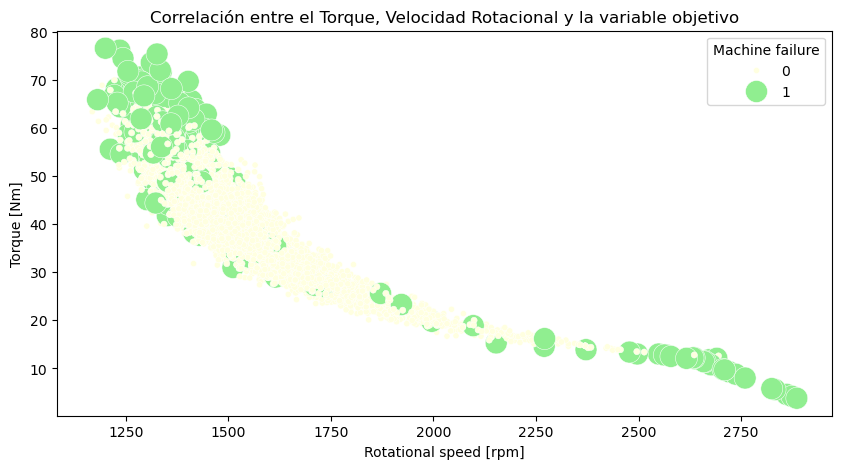

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', palette=['lightyellow', 'lightgreen'], data=df, size='Machine failure', sizes=(250, 20))
plt.title('Correlación entre el Torque, Velocidad Rotacional y la variable objetivo')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

Se visualiza que a valores altos de la variable "Rotational Speed" y "Torque", se producen fallas en la máquina. Es importante mantener estas dos variables, ya que, a pesar de que tienen una alta correlación, estas dos son causantes independientes de distintos tipos de falla.

Ahora se analiza la correlación entre las variables "Aire temperature" y "Process temperature". Estas dos variables causan el tipo de falla por disipación de calor, por lo tanto, se creará una nueva variable llamada "Diff_temp", que será la diferencia de estas variables, de tal forma que se elimine esa alta correlación del futuro modelo de clasificación.

In [10]:
df["Diff_temp"] = df['Air temperature [K]'] - df['Process temperature [K]']

In [11]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Num_Serie,PType,Diff_temp
UDI,,,,,,,,,,,,,,
1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,14860,1.0,-10.5
2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,47181,0.0,-10.5
3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,47182,0.0,-10.4
4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,47183,0.0,-10.4
5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,47184,0.0,-10.5


In [12]:
df.drop(columns=["Air temperature [K]", "Process temperature [K]"], inplace=True)

In [13]:
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Num_Serie,PType,Diff_temp
UDI,,,,,,,,,,,,
1,1551,42.8,0,0,0,0,0,0,0,14860,1.0,-10.5
2,1408,46.3,3,0,0,0,0,0,0,47181,0.0,-10.5
3,1498,49.4,5,0,0,0,0,0,0,47182,0.0,-10.4
4,1433,39.5,7,0,0,0,0,0,0,47183,0.0,-10.4
5,1408,40.0,9,0,0,0,0,0,0,47184,0.0,-10.5


Es importante mencionar que para entrenar al modelo de Machine Learning no se considerarán las variables de la causa de falla, ya que estas vienen a comportarse como variables objetivo, y entrenar un modelo para cada una de estas variables no es posible, debido a su poca cantidad, por lo tanto, el modelo se entrenará con el objetivo de predecir la variable "Machine failure".

In [14]:
df.drop(columns="TWF", inplace = True)
df.drop(columns="HDF", inplace = True)
df.drop(columns="PWF", inplace = True)
df.drop(columns="OSF", inplace = True)
df.drop(columns="RNF", inplace = True)

In [15]:
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Num_Serie,PType,Diff_temp
UDI,,,,,,,
1,1551,42.8,0,0,14860,1.0,-10.5
2,1408,46.3,3,0,47181,0.0,-10.5
3,1498,49.4,5,0,47182,0.0,-10.4
4,1433,39.5,7,0,47183,0.0,-10.4
5,1408,40.0,9,0,47184,0.0,-10.5


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.0,1.0
Num_Serie,10000.0,40711.26620,14870.160877,14860.0,23214.75,48861.5,53001.5,57174.0
PType,10000.0,0.50030,0.671301,0.0,0.00,0.0,1.0,2.0
Diff_temp,10000.0,-10.00063,1.001094,-12.1,-11.00,-9.8,-9.3,-7.6


De todas las variables, se observa que la cual presenta mayor desviación estandar (variabilidad), es el número de serie, seguido por la velocidad rotacional y el desgaste de la herramienta. El resto de variables no varía demasiado.

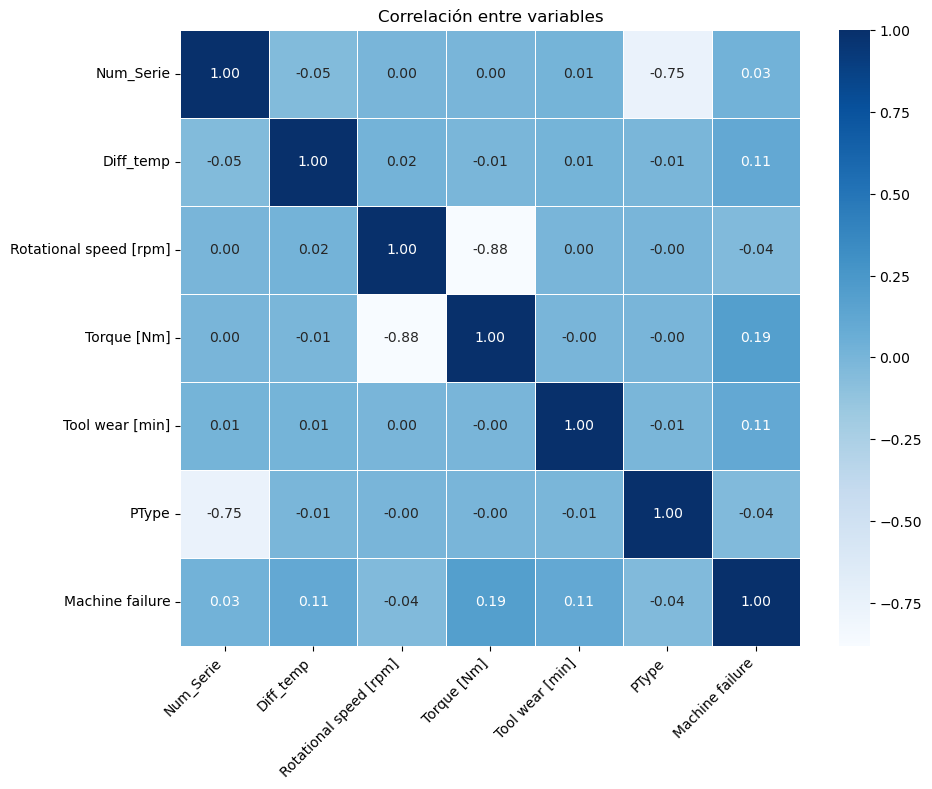

In [31]:
# De forma gráfica
plt.figure(figsize=(10, 8))
heatmap_data = df[['Num_Serie', "Diff_temp", 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', "PType", 'Machine failure']]
df_corr = heatmap_data.corr().apply(lambda x: round(x, 2))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre variables')
plt.xticks(rotation=45, ha='right')
plt.show()

De todas las variables, la que tiene más relación con la variable objetivo es la variable **"Torque"**, seguido del **"Tool wear"** y **Diff_temp**.

Se puede observar que "Num_Serie" presenta una correlación positiva muy fuerte con "PType"; sin embargo, la información que entrega "Ptype" (tipo de producto) es más concreta que el número de serie de un producto, por lo que se decide en eliminar la variable "Num_Serie".

In [17]:
df.drop(columns="Num_Serie", inplace = True)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
PType,10000.0,0.50030,0.671301,0.0,0.0,0.0,1.0,2.0
Diff_temp,10000.0,-10.00063,1.001094,-12.1,-11.0,-9.8,-9.3,-7.6


Busqueda de outliers en las variables:

In [34]:
def es_outlier(df, columna, umbral=1.5):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  return (df[columna]<q1-umbral*iqr)|(df[columna]>q3+umbral*iqr)

In [35]:
for i in df.columns:
  print("Cantidad de outliers para " + i + ":", df.loc[es_outlier(df, i)].shape[0])

Cantidad de outliers para Rotational speed [rpm]: 418
Cantidad de outliers para Torque [Nm]: 69
Cantidad de outliers para Tool wear [min]: 0
Cantidad de outliers para Machine failure: 339
Cantidad de outliers para PType: 0
Cantidad de outliers para Diff_temp: 0


Se observa que la variable "Rotational speed" presenta una gran cantidad outliers, seguido de la variable "Torque", sin contar a "Machine failure" que es la variable objetivo.

Además de ser un dataset limitado en datos, del análisis de la gráfica previa se observó que los valores extremos de "Rotational speed" y "Torque" definian muchos fallos en la máquina, por lo que se decide en no borrar esos outliers.

Text(0.5, 1.0, 'Gráfica de Rotational speed [rpm]')

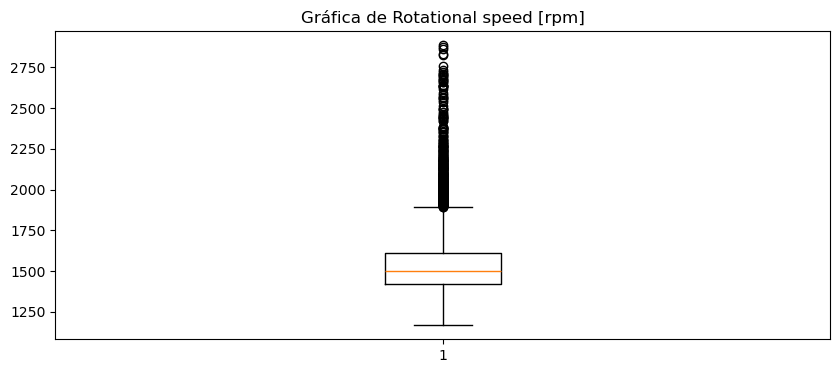

In [36]:
#Gráfica de outliers
plt.figure(figsize=(10,4))
plt.boxplot(df["Rotational speed [rpm]"])
plt.title("Gráfica de Rotational speed [rpm]")

Text(0.5, 1.0, 'Gráfica de Torque [Nm]')

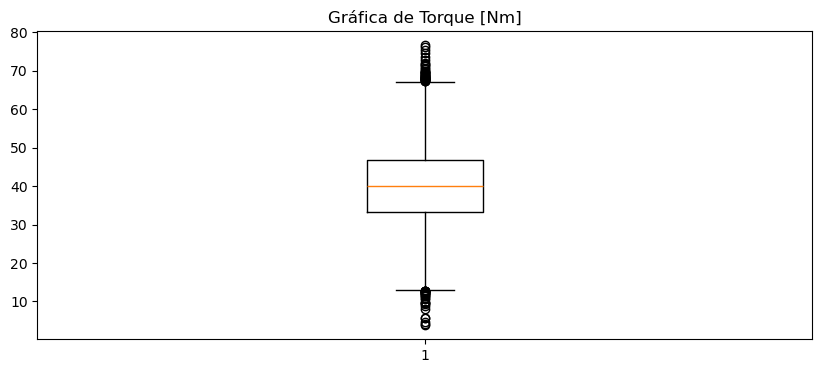

In [37]:
#Gráfica de outliers
plt.figure(figsize=(10,4))
plt.boxplot(df["Torque [Nm]"])
plt.title("Gráfica de Torque [Nm]")

# Nivelación de categoría de variable objetivo

In [19]:
df["Machine failure"].value_counts(normalize = True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

Se observa que este dataset está totalmente desbalanceado, siendo casi el 97% valores "0".

Por lo tanto, se aplicará oversampling para equilibrar un poco, pero antes se separarán las variables en train y test y se realizará un escalado de estas. 

Para dividir los datos en conjuntos de entrenamiento y de prueba, se considerará un muestreo **estratisficado** en la variable objetivo, de tal forma que el entrenamiento y test presenten la misma equivalencia de valores objetivo.

In [20]:
# Separación en datos train - test
from sklearn.model_selection import train_test_split

X = df.drop(columns = "Machine failure")
Y = df['Machine failure']

X_train,X_test,y_train,y_test = train_test_split(X, Y, train_size = 0.8, random_state = 20, stratify = Y)

In [21]:
# Escalar datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Ahora se procede a aplicar oversampling; es decir, aumentar la cantidad de valores de la variable con menos datos.

Para este caso se utilizará la técnica **SMOTE**, la cual crea muestras sintéticas interpolando características entre las muestras seleccinadas y sus vecinos más cercanos en el espacio de características.

In [22]:
from imblearn.over_sampling import SMOTE

print("Antes de SMOTE:")
print(y_train.value_counts())

# Se separan las variables características de la variable objetivo
x_smote = X_train_sc
y_smote = y_train

# Aplicando SMOTE
smote = SMOTE(sampling_strategy= 0.1, k_neighbors = 10) # Se incrementan al 5% de la cantidad de datos de la clase mayor
x_resampled_smote, y_resampled_smote = smote.fit_resample(x_smote, y_smote)

# Creando nuevo DataFrame con datos sobremuestreados
df_oversampled_smote = pd.DataFrame(x_resampled_smote, columns=x_smote.columns)
df_oversampled_smote["Machine failure"] = y_resampled_smote

print("\nDespués de SMOTE:")
print(df_oversampled_smote['Machine failure'].value_counts())

Antes de SMOTE:
Machine failure
0    7729
1     271
Name: count, dtype: int64

Después de SMOTE:
Machine failure
0    7729
1     772
Name: count, dtype: int64


# Selección de modelo

In [23]:
X_train_f = df_oversampled_smote.drop(columns = ["Machine failure"])
y_train_f = df_oversampled_smote["Machine failure"]

In [24]:
# Se entrenan los modelos que se van a comparar:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

#Logistic regression
lr = LogisticRegression()
lr.fit(X_train_f, y_train_f)

#Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_f, y_train_f)

#Naive Bayes
nb = GaussianNB()
nb.fit(X_train_f, y_train_f)

#SVC
svc = SVC(kernel = "rbf", probability = True) # Kernel gaussiano
svc.fit(X_train_f, y_train_f)

SVC(probability=True)

In [25]:
# Se observa la exactitud de cada modelo
from sklearn.metrics import accuracy_score

print(f'Exactitud - Naive Bayes {accuracy_score(y_test, nb.predict(X_test_sc)):.4f}')
print(f'Exactitud - Decision Tree: {accuracy_score(y_test, dt.predict(X_test_sc)):.4f}')
print(f'Exactitud - Logistic Regression: {accuracy_score(y_test, lr.predict(X_test_sc)):.4f}')
print(f'Exactitud - SVC: {accuracy_score(y_test, svc.predict(X_test_sc)):.4f}')

Exactitud - Naive Bayes 0.9525
Exactitud - Decision Tree: 0.9815
Exactitud - Logistic Regression: 0.9715
Exactitud - SVC: 0.9775


In [26]:
# Se observa el score ROC AUC de cada modelo
from sklearn.metrics import roc_auc_score

# Cálculo de probabilidades
y_pred_proba_nb = nb.predict_proba(X_test_sc)[:,1]
y_pred_proba_dt = dt.predict_proba(X_test_sc)[:,1]
y_pred_proba_lr = lr.predict_proba(X_test_sc)[:,1]
y_pred_proba_svc = svc.predict_proba(X_test_sc)[:,1]

# Resultados 
print(f'ROC-AUC para Naive Bayes: {roc_auc_score(y_test, y_pred_proba_nb)}')
print(f'ROC-AUC para Arbol de decisión: {roc_auc_score(y_test, y_pred_proba_dt)}')
print(f'ROC-AUC para Regresión logística: {roc_auc_score(y_test, y_pred_proba_lr)}')
print(f'ROC-AUC para SVC: {roc_auc_score(y_test, y_pred_proba_svc)}')

ROC-AUC para Naive Bayes: 0.9156238582389478
ROC-AUC para Arbol de decisión: 0.8556357325538912
ROC-AUC para Regresión logística: 0.8996696504688833
ROC-AUC para SVC: 0.9653094933625626


Se observa que SVC con el kernel gaussiano obtiene el mejor puntaje de roc-auc, por lo cual se usará este modelo y se optimizará para mejorar su resultado.

Se utilizará busqueda por grilla y se optimizarán los valores de C y gamma.

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definimos el modelo
svc = SVC(kernel = "rbf")

# Grilla con valores de búsqueda
param_grid = {
    'C' : np.logspace(-2, 2),
    'gamma' : np.logspace(-4, 4)
}

# Configuración de búsqueda en grilla
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, scoring='roc_auc', n_jobs = -1, verbose = 2)

# Se ajusta el modelo a la búsqueda en grilla
grid_search.fit(X_train_f, y_train_f)

# Se obtienen los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

Se obtienen que los mejores parámetros son: {C = 39, gamma = 1.75)

In [27]:
# Modelo final
svc_final = SVC(kernel = "rbf", C = 39, gamma = 1.75, probability = True)
svc_final.fit(X_train_f, y_train_f)

SVC(C=39, gamma=1.75, probability=True)

In [28]:
# Se evalua el modelo con los mejores parámetros encontrados
y_proba = svc_final.predict_proba(X_test_sc)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC del mejor modelo en el conjunto test:", roc_auc)

ROC AUC del mejor modelo en el conjunto test: 0.9667138594568262


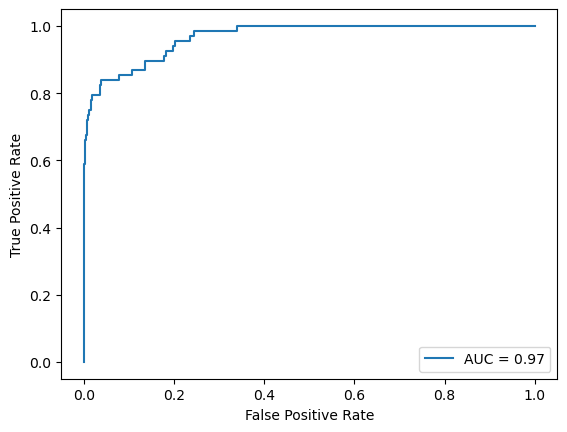

In [29]:
# Curva ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Matriz de confusión:

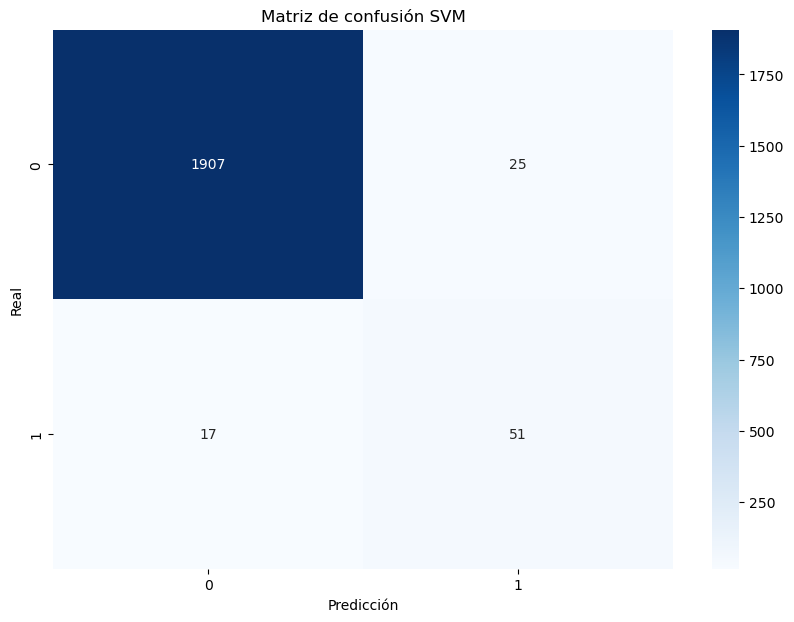

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicción
y_pred = svc_final.predict(X_test_sc)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión SVM')
plt.show()

Curva de aprendizaje:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

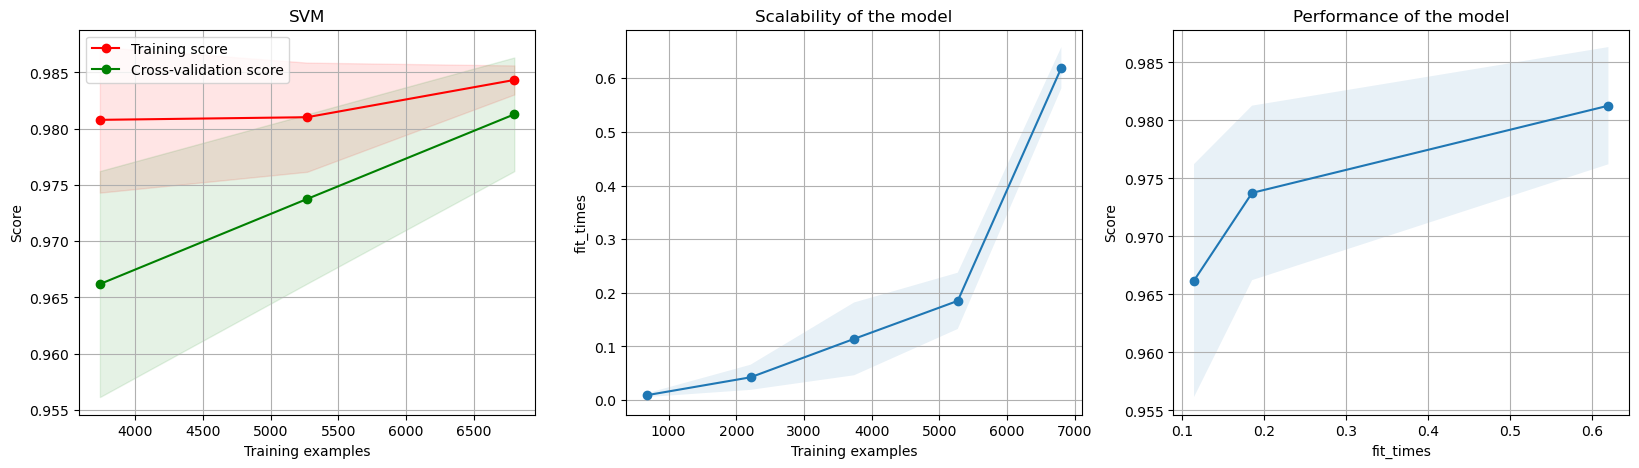

In [33]:
estimator = SVC(kernel = "rbf", C = 39, gamma = 1.75)
plot_learning_curve(estimator, 'SVM', X_train_f, y_train_f, cv=5)
plt.show()

Conclusiones:

-La puntuación del entrenamiento es consistentemente alta (alrededor de 0.985), lo que indica que el modelo ajusta bien los datos de entrenamiento. Por otro lado, la puntuación de validación cruzada también es alta y mejora con más ejemplos de entrenamiento, alcanzando alrededor de 0.980. Esto indica que el modelo generaliza bien.

-La brecha entre las curvas de entrenamiento y validación es pequeña y disminuye ligeramente con más datos, lo cual indica que no hay sobreajuste significativo y que el modelo se beneficia de tener más datos.

-También se observa que los tiempos de ajuste del modelo aumentan casi exponencialmente con el número de ejemplos de entrenamiento. Esto es típico de modelos SVC, ya que el ajuste de un SVM puede ser computacionalmente costoso para grandes conjuntos de datos.

Se prueba ahora con un modelo más complejo, Random Forest, a ver si mejora el rendimiento del algoritmo.

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(oob_score = True)
rf.fit(X_train_f, y_train_f)

print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train_f, y_train_f))
print('Exactitud del modelo inicial en entrenamiento (Out of Bag):', rf.oob_score_)
print('Exactitud del modelo inicial en test:', rf.score(X_test_sc, y_test))

y_pred_proba = rf.predict_proba(X_test_sc)[:,1]
print("Score ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Exactitud del modelo inicial en entrenamiento: 1.0
Exactitud del modelo inicial en entrenamiento (Out of Bag): 0.9802376191036348
Exactitud del modelo inicial en test: 0.988
Score ROC AUC: 0.9924301242236024


Se observa que con los parámetros por defecto, se obtiene un score ROC-AUC de casi el 99%.

Ahora se hará una busqueda por grilla para mejorar el resultado.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir la grilla de parámetros
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda en grilla
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Ajustar el modelo con la búsqueda en grilla
grid_search.fit(X_train_f, y_train_f)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

Los mejores parámetros según la búsqueda por grilla son: {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, los cuales brindan un ROC AUC ligeramente superior al 99%.

In [35]:
# Modelo final RF
rf_final = RandomForestClassifier(bootstrap=False, max_depth = 10, max_features = "auto", min_samples_leaf = 1, min_samples_split = 5, 
                                  n_estimators = 200, random_state=42)
rf_final.fit(X_train_f, y_train_f)

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=10, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=42)

In [36]:
# Se evalua el modelo con los mejores parámetros encontrados
y_proba = rf_final.predict_proba(X_test_sc)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC del mejor modelo en el conjunto test:", roc_auc)

ROC AUC del mejor modelo en el conjunto test: 0.9909572524662039


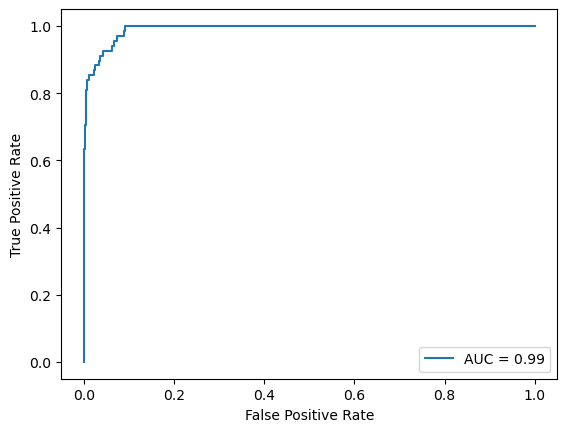

In [37]:
### Curva ROC
from sklearn import metrics

y_pred_val = rf_final.predict_proba(X_test_sc)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_val)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Matriz de confusión para Random Forest:

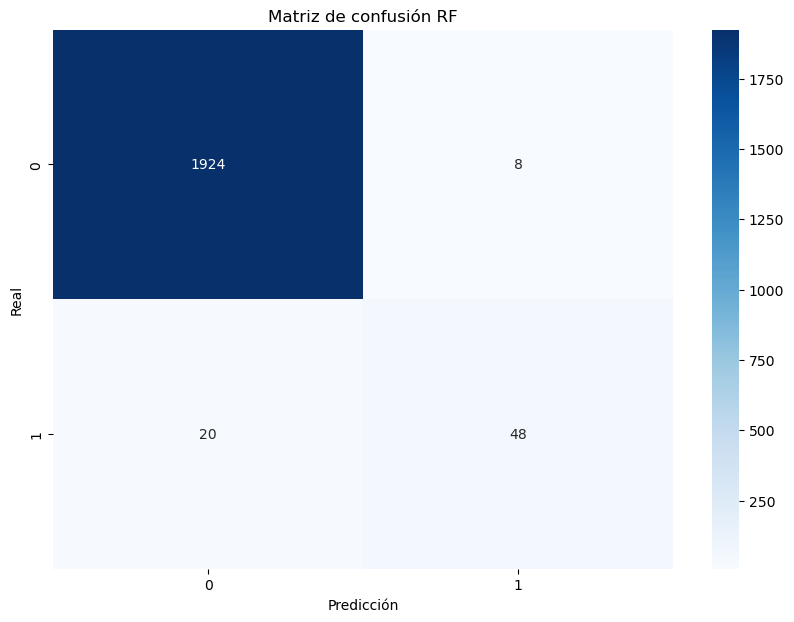

In [38]:
from sklearn.metrics import confusion_matrix

# Predicción
y_pred = rf_final.predict(X_test_sc)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión RF')
plt.show()

Se observa en la matriz de confusión de Random Forest que el error de tipo I se ha reducido en comparación a la matriz de confusión del modelo SVM.

Text(0.5, 1.0, 'Importancia de variables para el clasificador')

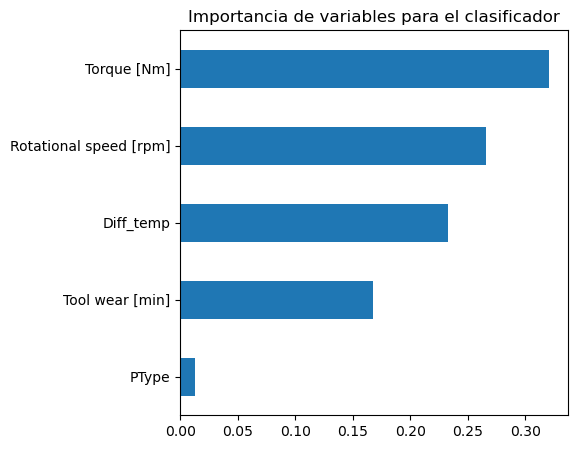

In [39]:
# Importancia de las variables

plt.figure(figsize=(5,5))
# Para metodos lineales, como Regresion Logistica, usamos clf.coef_.
# Otros metodos -como arboles- tienen el atributo feature_importances_
df_importancias = pd.DataFrame.from_dict({x:abs(y) for x,y in zip(X_train_f.columns,rf_final.feature_importances_)}, orient='index', columns=['Importancia'])
df_importancias = df_importancias.sort_values(by='Importancia', ascending=True)
df_importancias.Importancia.plot(kind='barh')
plt.title('Importancia de variables para el clasificador')

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rober\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rober\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rober\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^

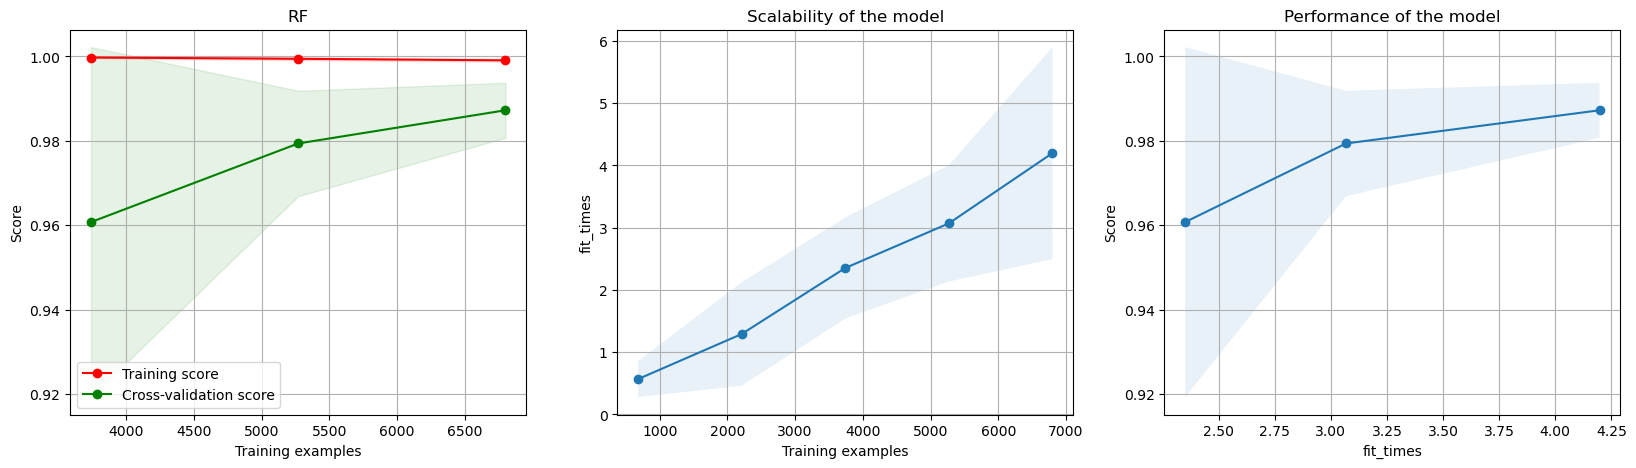

In [89]:
estimator = RandomForestClassifier(bootstrap=False, max_depth = 10, max_features = "auto", min_samples_leaf = 1, min_samples_split = 5, 
                                  n_estimators = 200, random_state=42)
plot_learning_curve(estimator, 'RF', X_train_f, y_train_f, cv=5)
plt.show()

En la curva de aprendizaje del modelo RF se obtiene un training score de aproximadamente 1, indicando que el modelo se ajusta perfectamente a los datos de entrenamiento, y mejora con más datos de entrenamiento, alcanzado aproximadamente 0.98. También se observa en la segunda gráfica que el modelo RF escala de manera lineal y en la tercera gráfica se ve que el modelo mejora de manera gradual hasta alcanzar una puntuación cercana a 1.

Comparando los modelos SVM y RF, ambos presentan un buen desempeño; sin embargo, el modelo RF muestra un mejor puntaje de validación cruzada y una mejora continua, por otro lado, RF muestra más sobreajuste en los datos de entrenamiento, ya que presenta una brecha más significativa. En adición, se observa que RF escala mejor en términos de tiempos de ajuste comparado con SVC, lo cual es un factor importante para grandes conjuntos de datos.

En general, ambos modelos presentan sus fortalezas y debilidades. Según lo visto, un modelo SVM es adecuado para situaciones donde el equilibrio entre precisión y tiempo de ajuste es crucial, y cuando se dispone de un volumen de datos manejable, mientras que RF es más robusto y puede manejar mejor la variabilidad y el aumento de datos, aunque a costa de tiempos de ajuste más largos y una posible tendencia al sobreajuste.